In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import warnings

%matplotlib inline

# Loading data set

In [2]:
raw_data = pd.read_csv('train_data.csv')
raw_data

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend,Income
0,1,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,Android,2,9,10,Returning_Visitor,no,1
1,2,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,Android,4,4,2,Returning_Visitor,no,0
2,3,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,Android,2,3,2,Returning_Visitor,no,0
3,4,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,Windows,1,1,3,New_Visitor,1,1
4,5,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,Android,2,1,1,Returning_Visitor,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,9939,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,0.0,May,Android,2,2,4,Returning_Visitor,1,1
9939,9940,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,0.0,Nov,iOS,2,7,10,Returning_Visitor,no,0
9940,9941,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,0.0,Mar,Android,2,2,3,Returning_Visitor,1,0
9941,9942,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,0.0,Nov,Android,2,2,2,Returning_Visitor,no,0


# Data Preprocessing

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9943 entries, 0 to 9942
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9943 non-null   int64  
 1   Aboutus                 9928 non-null   float64
 2   Aboutus_Duration        9928 non-null   float64
 3   Item_page               9928 non-null   float64
 4   Item_page_Duration      9928 non-null   float64
 5   Checkout_page           9928 non-null   float64
 6   Checkout_page_Duration  9928 non-null   float64
 7   Bounce_Rates            9928 non-null   float64
 8   Exit_Rates              9928 non-null   float64
 9   Page_Values             9943 non-null   float64
 10  Remarkable_Day          9943 non-null   float64
 11  Month                   9943 non-null   object 
 12  Operating_Systems       9943 non-null   object 
 13  Browser                 9943 non-null   int64  
 14  Province                9943 non-null   

In [4]:
raw_data.isnull().sum()

ID                         0
Aboutus                   15
Aboutus_Duration          15
Item_page                 15
Item_page_Duration        15
Checkout_page             15
Checkout_page_Duration    15
Bounce_Rates              15
Exit_Rates                15
Page_Values                0
Remarkable_Day             0
Month                      0
Operating_Systems          0
Browser                    0
Province                   0
TrafficType                0
VisitorType                0
Weekend                    0
Income                     0
dtype: int64

In [5]:
raw_data = raw_data.dropna()
raw_data.isnull().sum()

ID                        0
Aboutus                   0
Aboutus_Duration          0
Item_page                 0
Item_page_Duration        0
Checkout_page             0
Checkout_page_Duration    0
Bounce_Rates              0
Exit_Rates                0
Page_Values               0
Remarkable_Day            0
Month                     0
Operating_Systems         0
Browser                   0
Province                  0
TrafficType               0
VisitorType               0
Weekend                   0
Income                    0
dtype: int64

In [6]:
raw_data.shape

(9928, 19)

In [7]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :9928
The number of values for feature Aboutus :17 -- [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 24.]
The number of values for feature Aboutus_Duration :1067
The number of values for feature Item_page :27 -- [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 26. 27.]
The number of values for feature Item_page_Duration :2822
The number of values for feature Checkout_page :292
The number of values for feature Checkout_page_Duration :7830
The number of values for feature Bounce_Rates :1607
The number of values for feature Exit_Rates :3989
The number of values for feature Page_Values :2169
The number of values for feature Remarkable_Day :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10 -- ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
The number of values for feature Operating_Systems :8 -- ['Android' 'CentOS' 'Fedora' 'Ubuntu' 'Windows' 'iOS

In [8]:
raw_data.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend',
       'Income'],
      dtype='object')

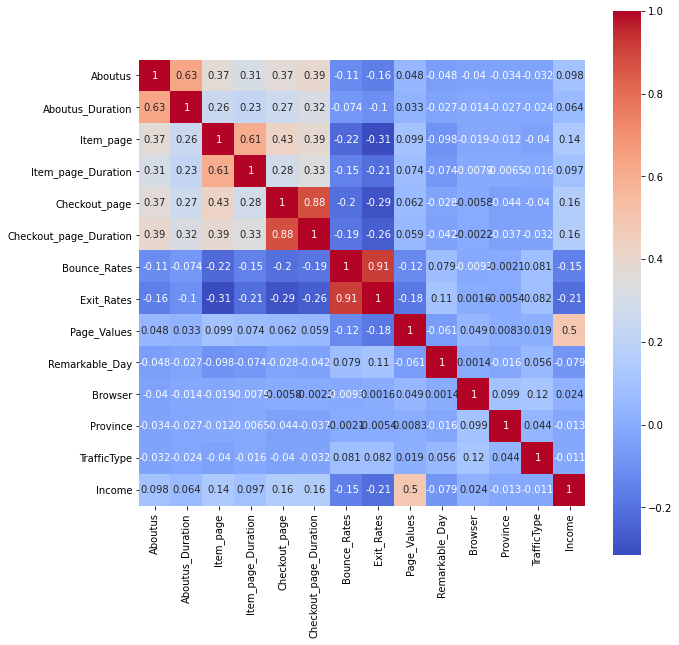

In [9]:
raw_data2 = raw_data[['Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration','Checkout_page', 
                    'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates','Page_Values', 'Remarkable_Day', 'Month',
                      'Operating_Systems','Browser', 'Province', 'TrafficType', 'VisitorType', 'Weekend','Income']]

plt.figure(figsize=(10,10))
sns.heatmap(raw_data2.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

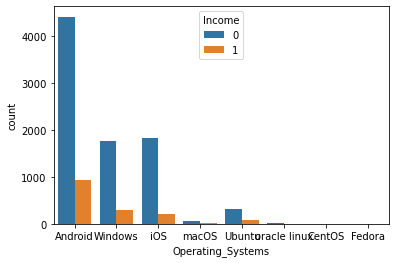

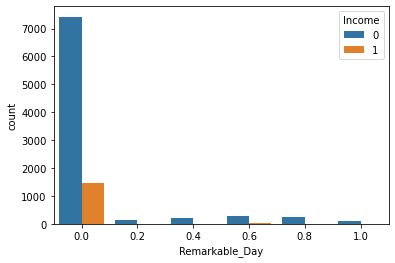

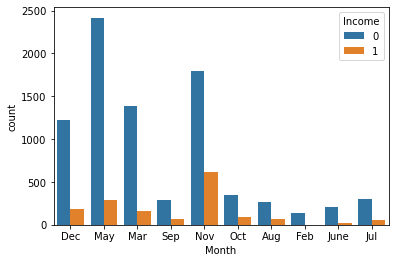

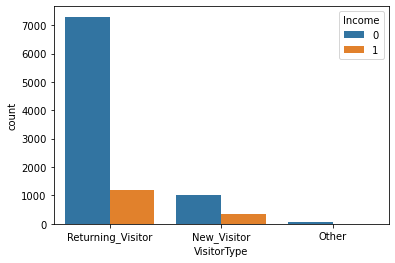

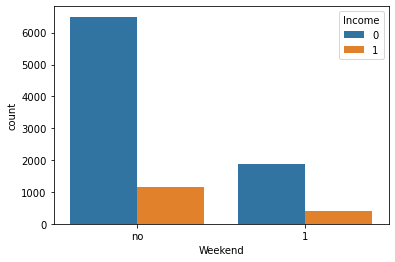

In [10]:
cat_columns = ['Operating_Systems','Remarkable_Day','Month','VisitorType','Weekend']

for col in cat_columns:
    plt.figure()
    ax = sns.countplot(x=col, data=raw_data2, hue='Income')

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

raw_data2['Operating_Systems'] = le.fit_transform(raw_data2['Operating_Systems'])
raw_data2['Remarkable_Day'] = le.fit_transform(raw_data2['Remarkable_Day'])
raw_data2['Month'] = le.fit_transform(raw_data2['Month'])
# raw_data2['VisitorType'] = le.fit_transform(raw_data2['VisitorType'])
# raw_data2['Weekend'] = le.fit_transform(raw_data2['Weekend'])

raw_data2 = pd.get_dummies(raw_data2, columns=['VisitorType','Weekend'])

raw_data2

<ipython-input-11-75ee8ddbcf9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['Operating_Systems'] = le.fit_transform(raw_data2['Operating_Systems'])
<ipython-input-11-75ee8ddbcf9a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['Remarkable_Day'] = le.fit_transform(raw_data2['Remarkable_Day'])
<ipython-input-11-75ee8ddbcf9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,...,Operating_Systems,Browser,Province,TrafficType,Income,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0.0,0.0,1.0,10.0,9.0,700.000000,0.000000,0.011111,29.621890,0,...,0,2,9,10,1,0,0,1,0,1
1,0.0,0.0,2.0,15.0,10.0,894.666667,0.000000,0.022222,0.000000,0,...,0,4,4,2,0,0,0,1,0,1
2,0.0,0.0,1.0,85.0,14.0,306.500000,0.000000,0.004444,0.000000,0,...,0,2,3,2,0,0,0,1,0,1
3,0.0,0.0,5.0,175.1,26.0,615.559524,0.000000,0.002083,62.773672,0,...,4,1,1,3,1,1,0,0,1,0
4,0.0,0.0,2.0,25.0,5.0,40.000000,0.066667,0.083333,0.000000,3,...,0,2,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.0,0.0,0.0,0.0,8.0,376.333333,0.000000,0.028571,53.988000,0,...,0,2,2,4,1,0,0,1,1,0
9939,1.0,46.5,1.0,0.0,22.0,671.866667,0.017391,0.020580,0.000000,0,...,5,2,7,10,0,0,0,1,0,1
9940,0.0,0.0,0.0,0.0,15.0,872.833333,0.000000,0.026667,0.000000,0,...,0,2,2,3,0,0,0,1,1,0
9941,0.0,0.0,2.0,327.5,7.0,570.500000,0.000000,0.028571,0.000000,0,...,0,2,2,2,0,0,0,1,0,1


In [12]:
raw_data2.columns

Index(['Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'Income',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_1', 'Weekend_no'],
      dtype='object')

In [13]:
raw_data2 = raw_data2[['Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Bounce_Rates','Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'Income',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_1', 'Weekend_no']]

raw_data2

,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,Income,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0.0,0.0,1.0,10.0,9.0,0.000000,29.621890,0,1,0,2,9,10,1,0,0,1,0,1
1,0.0,0.0,2.0,15.0,10.0,0.000000,0.000000,0,6,0,4,4,2,0,0,0,1,0,1
2,0.0,0.0,1.0,85.0,14.0,0.000000,0.000000,0,5,0,2,3,2,0,0,0,1,0,1
3,0.0,0.0,5.0,175.1,26.0,0.000000,62.773672,0,9,4,1,1,3,1,1,0,0,1,0
4,0.0,0.0,2.0,25.0,5.0,0.066667,0.000000,3,6,0,2,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.0,0.0,0.0,0.0,8.0,0.000000,53.988000,0,6,0,2,2,4,1,0,0,1,1,0
9939,1.0,46.5,1.0,0.0,22.0,0.017391,0.000000,0,7,5,2,7,10,0,0,0,1,0,1
9940,0.0,0.0,0.0,0.0,15.0,0.000000,0.000000,0,5,0,2,2,3,0,0,0,1,1,0
9941,0.0,0.0,2.0,327.5,7.0,0.000000,0.000000,0,7,0,2,2,2,0,0,0,1,0,1


In [14]:
# Scaling our columns
# normalizing some variables 
scale_vars = ['Aboutus_Duration','Item_page_Duration','Page_Values','Bounce_Rates']
scaler = MinMaxScaler()
raw_data2[scale_vars] = scaler.fit_transform(raw_data2[scale_vars])
raw_data2

<ipython-input-14-1cc844f9c611>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2[scale_vars] = scaler.fit_transform(raw_data2[scale_vars])
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,Income,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0.0,0.000443,1.0,0.004138,9.0,0.000000,0.082066,0,1,0,2,9,10,1,0,0,1,0,1
1,0.0,0.000443,2.0,0.006019,10.0,0.000000,0.000000,0,6,0,4,4,2,0,0,0,1,0,1
2,0.0,0.000443,1.0,0.032351,14.0,0.000000,0.000000,0,5,0,2,3,2,0,0,0,1,0,1
3,0.0,0.000443,5.0,0.066245,26.0,0.000000,0.173911,0,9,4,1,1,3,1,1,0,0,1,0
4,0.0,0.000443,2.0,0.009781,5.0,0.333333,0.000000,3,6,0,2,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,0.0,0.000443,0.0,0.000376,8.0,0.000000,0.149571,0,6,0,2,2,4,1,0,0,1,1,0
9939,1.0,0.021037,1.0,0.000376,22.0,0.086957,0.000000,0,7,5,2,7,10,0,0,0,1,0,1
9940,0.0,0.000443,0.0,0.000376,15.0,0.000000,0.000000,0,5,0,2,2,3,0,0,0,1,1,0
9941,0.0,0.000443,2.0,0.123574,7.0,0.000000,0.000000,0,7,0,2,2,2,0,0,0,1,0,1


# Splitting

In [15]:
# Your code goes here
X = raw_data2.drop('Income', axis=1).values# Input features (attributes)
y = raw_data2['Income'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X shape: (9928, 18)
y shape: (9928,)


# Random Forest

In [16]:
rf = RandomForestClassifier(n_estimators=160, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

In [17]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  0.9997121888041445
Testing Accuracy is:  0.9063444108761329
Confusion Matrix for Testing: 
 [[2436   89]
 [ 190  264]]


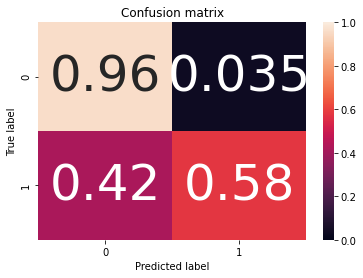

In [18]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

Classification accuracy on test set with max features = 1 and max_depth = None: accuracy 0.899
Classification accuracy on test set with max features = 1 and max_depth = 2: accuracy 0.848
Classification accuracy on test set with max features = 1 and max_depth = 3: accuracy 0.848
Classification accuracy on test set with max features = 1 and max_depth = 4: accuracy 0.848
Classification accuracy on test set with max features = 1 and max_depth = 5: accuracy 0.848
Classification accuracy on test set with max features = sqrt and max_depth = None: accuracy 0.901
Classification accuracy on test set with max features = sqrt and max_depth = 2: accuracy 0.848
Classification accuracy on test set with max features = sqrt and max_depth = 3: accuracy 0.861
Classification accuracy on test set with max features = sqrt and max_depth = 4: accuracy 0.882
Classification accuracy on test set with max features = sqrt and max_depth = 5: accuracy 0.896
Classification accuracy on test set with max features = log

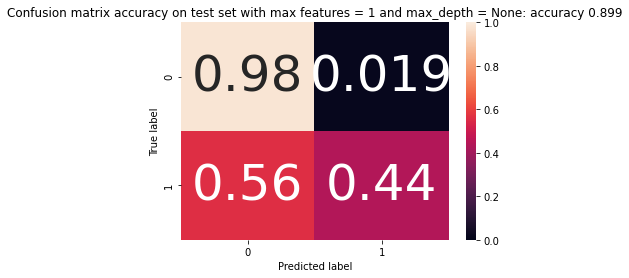

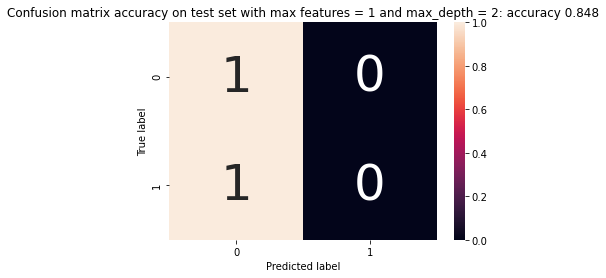

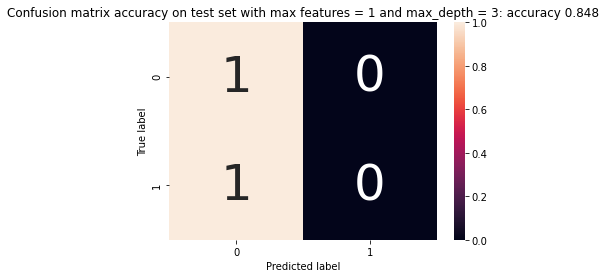

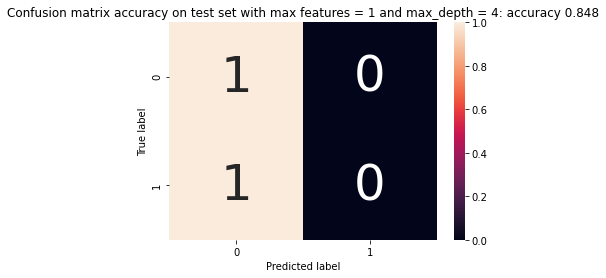

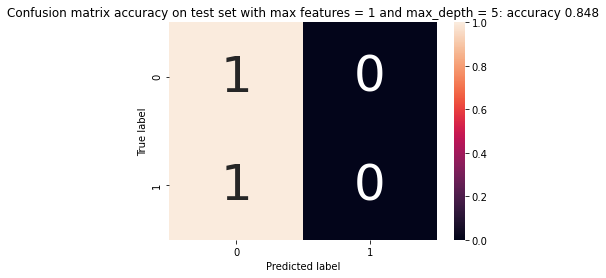

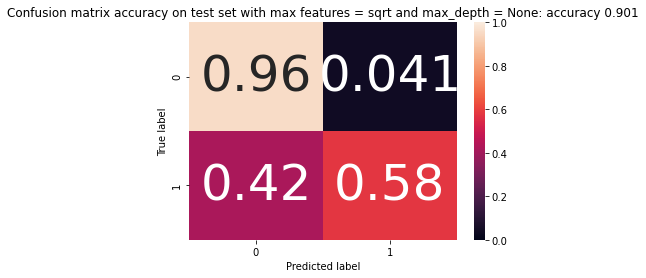

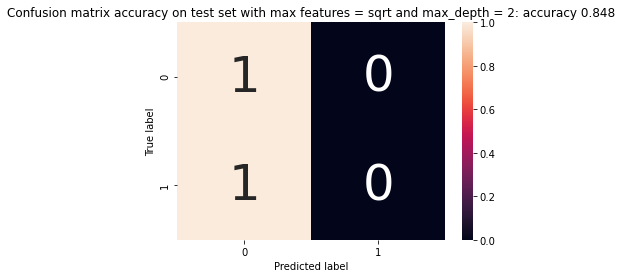

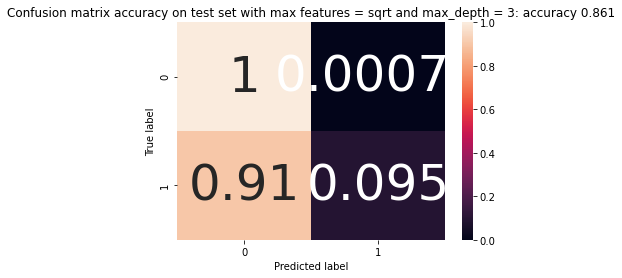

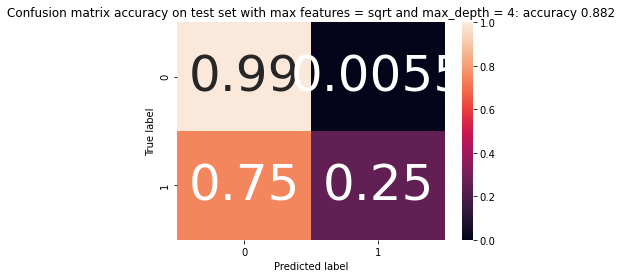

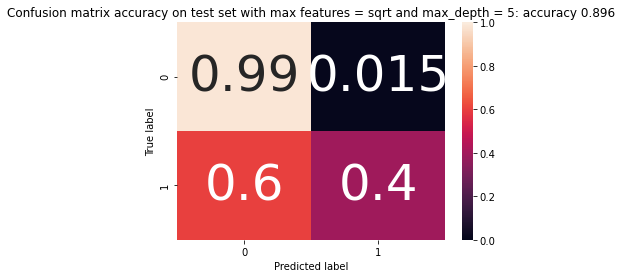

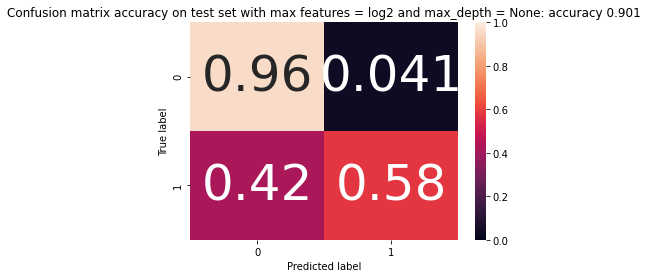

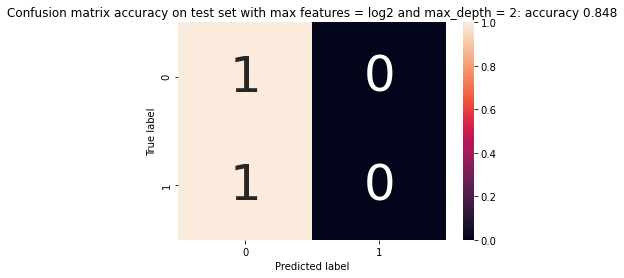

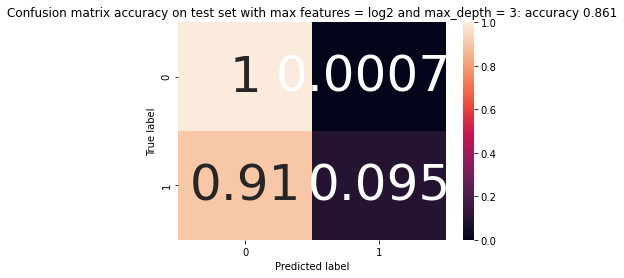

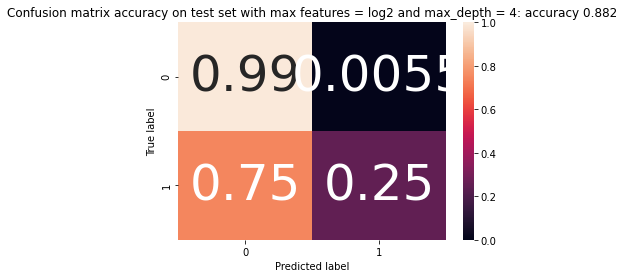

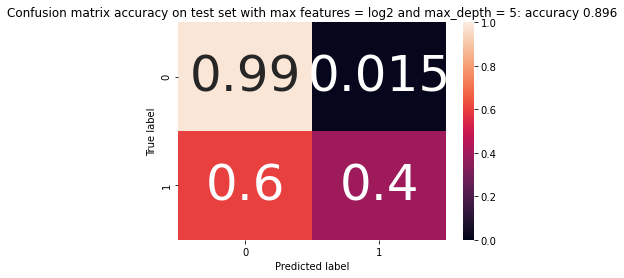

In [19]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: accuracy {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: accuracy {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

In [38]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.01,0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

# best parameters
# clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4, score=0.922, total=   0.8s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4 
[23:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4, score=0.940, total=   0.4s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4 
[23:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4, score=0.916, total=   0.4s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4 
[23:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4, score=0.937, total=   0.5s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4 
[23:36:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.3, gamma=0.2, colsample_bytree=0.4, score=0.938, total=   0.5s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[23:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.921, total=   0.5s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[23:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.939, total=   0.5s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[23:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.916, total=   0.4s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[23:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.935, total=   0.4s
[CV] min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3 
[23:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=3, learning_rate=0.1, gamma=0.2, colsample_bytree=0.3, score=0.939, total=   0.4s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[23:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, score=0.917, total=   3.2s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[23:36:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, score=0.938, total=   3.1s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[23:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, score=0.916, total=   3.2s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[23:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, score=0.935, total=   3.0s
[CV] min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7 
[23:36:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=3, max_depth=8, learning_rate=0.01, gamma=0.0, colsample_bytree=0.7, score=0.939, total=   2.9s
[CV] min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 
[23:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.914, total=   0.3s
[CV] min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 
[23:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.932, total=   0.4s
[CV] min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 
[23:36:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.913, total=   0.4s
[CV] min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 
[23:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.931, total=   0.4s
[CV] min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5 
[23:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=2, learning_rate=0.05, gamma=0.3, colsample_bytree=0.5, score=0.933, total=   0.3s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3 
[23:36:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3, score=0.923, total=   1.4s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3 
[23:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3, score=0.936, total=   1.3s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3 
[23:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3, score=0.922, total=   1.2s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3 
[23:36:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3, score=0.930, total=   1.3s
[CV] min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3 
[23:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=5, max_depth=15, learning_rate=0.25, gamma=0.2, colsample_bytree=0.3, score=0.932, total=   1.3s
[23:36:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   28.6s finished
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [39]:
clf.best_params_

{'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.3,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [40]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

[23:37:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix for Testing: 
 [[8089  291]
 [ 548 1000]]


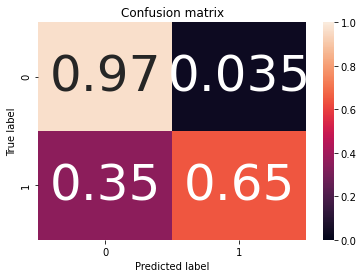

In [41]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

print('Confusion Matrix for Testing: \n' ,cm)

In [42]:
print("Training Accuracy is: ", final_model.score(X, y))

Training Accuracy is:  0.915491539081386


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [21]:
bestfeatures = SelectKBest(score_func=chi2, k=16)
fit = bestfeatures.fit(raw_data2.drop('Income', axis=1),raw_data2['Income'])

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(raw_data2.drop('Income', axis=1).columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features

                            Specs         Score
4                   Checkout_page  16158.094283
2                       Item_page    867.555095
6                     Page_Values    383.968026
0                         Aboutus    318.252370
7                  Remarkable_Day    199.419211
5                    Bounce_Rates    120.971581
9               Operating_Systems    110.420918
13        VisitorType_New_Visitor    105.485691
8                           Month     61.135201
15  VisitorType_Returning_Visitor     17.432955
3              Item_page_Duration     12.663355
1                Aboutus_Duration      9.766432
10                        Browser      6.936114
16                      Weekend_1      5.644739
12                    TrafficType      4.977604
11                       Province      2.908885


In [22]:
#del final_fi

# Calculating FI
for i, column in enumerate(raw_data2.drop('Income', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, rf.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [rf.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature Aboutus:, 0.021
Importance of feature Aboutus_Duration:, 0.032
Importance of feature Item_page:, 0.052
Importance of feature Item_page_Duration:, 0.075
Importance of feature Checkout_page:, 0.114
Importance of feature Bounce_Rates:, 0.086
Importance of feature Page_Values:, 0.368
Importance of feature Remarkable_Day:, 0.007
Importance of feature Month:, 0.067
Importance of feature Operating_Systems:, 0.024
Importance of feature Browser:, 0.025
Importance of feature Province:, 0.043
Importance of feature TrafficType:, 0.044
Importance of feature VisitorType_New_Visitor:, 0.012
Importance of feature VisitorType_Other:, 0.001
Importance of feature VisitorType_Returning_Visitor:, 0.011
Importance of feature Weekend_1:, 0.009
Importance of feature Weekend_no:, 0.009


,index,Variable,Feature Importance Score
0,6,Page_Values,0.368102
1,4,Checkout_page,0.114483
2,5,Bounce_Rates,0.085943
3,3,Item_page_Duration,0.074948
4,8,Month,0.066951
5,2,Item_page,0.052326
6,12,TrafficType,0.043533
7,11,Province,0.043166
8,1,Aboutus_Duration,0.031813
9,10,Browser,0.024658


In [23]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.96348645 0.63888889]
The Precision per class is:  [0.94022989 0.74796748]
The False Alarm rate per class is:  [0.36111111 0.03651355]
The Miss Rate rate per class is:  [0.03651355 0.36111111]
The Classification error of each class is [0.0835851 0.0835851]
The Accuracy of each class is [0.9164149 0.9164149]

The average Recall is:  0.8011876717707106
The average Precision is:  0.8440986823661341
The average False Alarm is:  0.19881232822928935
The average Miss Rate rate is:  0.19881232822928935
The average Classification error is 0.08358509566968782
The average Accuracy is 0.9164149043303121


# Unseen dataset

In [25]:
testing_dataset = pd.read_csv('test_data.csv')
testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType,Weekend
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,0.0,Aug,Windows,1,2,4,Returning_Visitor,no
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,0.0,Mar,iOS,2,8,10,Returning_Visitor,no
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,0.0,Oct,Android,2,4,5,Returning_Visitor,no
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,0.0,Nov,Android,10,7,2,New_Visitor,1
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,0.8,May,Windows,1,9,1,Returning_Visitor,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,0.8,May,Android,5,4,1,Returning_Visitor,no
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,0.6,May,Android,5,1,4,Returning_Visitor,no
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,0.0,Aug,iOS,2,4,1,Returning_Visitor,1
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,0.0,Nov,Android,2,7,4,Returning_Visitor,1


In [26]:
testing_dataset.shape

(1000, 18)

In [27]:
# Investigate all the elements whithin each Feature 

for column in testing_dataset:
    unique_vals = np.unique(testing_dataset[column])
    nr_values = len(unique_vals)
    if nr_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature ID :1000
The number of values for feature Aboutus :11 -- [ 0  1  2  3  4  5  6  7  8  9 11]
The number of values for feature Aboutus_Duration :148
The number of values for feature Item_page :19 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 24]
The number of values for feature Item_page_Duration :422
The number of values for feature Checkout_page :124
The number of values for feature Checkout_page_Duration :891
The number of values for feature Bounce_Rates :283
The number of values for feature Exit_Rates :545
The number of values for feature Page_Values :236
The number of values for feature Remarkable_Day :6 -- [0.  0.2 0.4 0.6 0.8 1. ]
The number of values for feature Month :10 -- ['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
The number of values for feature Operating_Systems :6 -- ['Android' 'Ubuntu' 'Windows' 'iOS' 'macOS' 'oracle linux']
The number of values for feature Browser :11 -- [ 1  2  3  4  5  6  7  8 10 12 13]
Th

In [28]:
le = LabelEncoder()

testing_dataset['Operating_Systems'] = le.fit_transform(testing_dataset['Operating_Systems'])
testing_dataset['Remarkable_Day'] = le.fit_transform(testing_dataset['Remarkable_Day'])
testing_dataset['Month'] = le.fit_transform(testing_dataset['Month'])
# raw_data2['VisitorType'] = le.fit_transform(raw_data2['VisitorType'])
# raw_data2['Weekend'] = le.fit_transform(raw_data2['Weekend'])

testing_dataset = pd.get_dummies(testing_dataset, columns=['VisitorType','Weekend'])

testing_dataset

,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,...,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,...,0,2,1,2,4,0,0,1,0,1
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,...,5,3,2,8,10,0,0,1,0,1
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,...,8,0,2,4,5,0,0,1,0,1
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,...,7,0,10,7,2,1,0,0,1,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,...,6,2,1,9,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,0.0,0,0.000000,2,4.000000,0.000000,0.100000,0.000000,...,6,0,5,4,1,0,0,1,0,1
996,997,0,0.0,1,43.000000,36,2362.500000,0.000000,0.016190,0.000000,...,6,0,5,1,4,0,0,1,0,1
997,998,0,0.0,0,0.000000,25,1017.966667,0.008333,0.017361,0.000000,...,0,3,2,4,1,0,0,1,1,0
998,999,0,0.0,0,0.000000,18,587.733333,0.000000,0.022222,32.523808,...,7,0,2,7,4,0,0,1,1,0


In [29]:
testing_dataset.columns

Index(['ID', 'Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Checkout_page_Duration', 'Bounce_Rates', 'Exit_Rates',
       'Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_1',
       'Weekend_no'],
      dtype='object')

In [30]:
new_testing_dataset = testing_dataset[['Aboutus', 'Aboutus_Duration', 'Item_page', 'Item_page_Duration',
       'Checkout_page', 'Bounce_Rates','Page_Values', 'Remarkable_Day', 'Month', 'Operating_Systems',
       'Browser', 'Province', 'TrafficType',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_1', 'Weekend_no']]

new_testing_dataset

,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0,0.0,12,569.825000,127,0.006716,0.152167,0,0,2,1,2,4,0,0,1,0,1
1,0,0.0,0,0.000000,25,0.011200,0.000000,0,5,3,2,8,10,0,0,1,0,1
2,0,0.0,7,38.600000,70,0.000000,0.000000,0,8,0,2,4,5,0,0,1,0,1
3,0,0.0,4,105.266667,35,0.000000,0.000000,0,7,0,10,7,2,1,0,0,1,0
4,0,0.0,0,0.000000,3,0.000000,0.000000,4,6,2,1,9,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.0,0,0.000000,2,0.000000,0.000000,4,6,0,5,4,1,0,0,1,0,1
996,0,0.0,1,43.000000,36,0.000000,0.000000,3,6,0,5,1,4,0,0,1,0,1
997,0,0.0,0,0.000000,25,0.008333,0.000000,0,0,3,2,4,1,0,0,1,1,0
998,0,0.0,0,0.000000,18,0.000000,32.523808,0,7,0,2,7,4,0,0,1,1,0


In [31]:
# Scaling our columns
# normalizing some variables 
scale_vars = ['Aboutus_Duration','Item_page_Duration','Page_Values','Bounce_Rates']

scaler = MinMaxScaler()
new_testing_dataset[scale_vars] = scaler.fit_transform(new_testing_dataset[scale_vars])
new_testing_dataset

<ipython-input-31-47ed11ddc5da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_testing_dataset[scale_vars] = scaler.fit_transform(new_testing_dataset[scale_vars])
C:\Users\Raisul Zulfikar\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Bounce_Rates,Page_Values,Remarkable_Day,Month,Operating_Systems,Browser,Province,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no
0,0,0.000444,12,0.415296,127,0.033582,0.000421,0,0,2,1,2,4,0,0,1,0,1
1,0,0.000444,0,0.000728,25,0.056000,0.000000,0,5,3,2,8,10,0,0,1,0,1
2,0,0.000444,7,0.028810,70,0.000000,0.000000,0,8,0,2,4,5,0,0,1,0,1
3,0,0.000444,4,0.077313,35,0.000000,0.000000,0,7,0,10,7,2,1,0,0,1,0
4,0,0.000444,0,0.000728,3,0.000000,0.000000,4,6,2,1,9,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0.000444,0,0.000728,2,0.000000,0.000000,4,6,0,5,4,1,0,0,1,0,1
996,0,0.000444,1,0.032012,36,0.000000,0.000000,3,6,0,5,1,4,0,0,1,0,1
997,0,0.000444,0,0.000728,25,0.041667,0.000000,0,0,3,2,4,1,0,0,1,1,0
998,0,0.000444,0,0.000728,18,0.000000,0.089903,0,7,0,2,7,4,0,0,1,1,0


In [32]:
X_new = new_testing_dataset.values
X_new.shape

(1000, 18)

In [43]:
pred_test = final_model.predict(X_new)

pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [44]:
print((pred_test == 0).sum())

859


In [35]:
output = testing_dataset.copy()
output['Predictions - Income or Not'] = pred_test
output['Income'] = 'Empty'
output['Income'][output['Predictions - Income or Not'] == 0] = 0
output['Income'][output['Predictions - Income or Not'] == 1] = 1
output.head()

<ipython-input-35-f40f1da640f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Income'][output['Predictions - Income or Not'] == 0] = 0
<ipython-input-35-f40f1da640f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Income'][output['Predictions - Income or Not'] == 1] = 1


,ID,Aboutus,Aboutus_Duration,Item_page,Item_page_Duration,Checkout_page,Checkout_page_Duration,Bounce_Rates,Exit_Rates,Page_Values,...,Browser,Province,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1,Weekend_no,Predictions - Income or Not,Income
0,1,0,0.0,12,569.825000,127,6065.016218,0.006716,0.009265,0.152167,...,1,2,4,0,0,1,0,1,0,0
1,2,0,0.0,0,0.000000,25,770.028571,0.011200,0.034933,0.000000,...,2,8,10,0,0,1,0,1,0,0
2,3,0,0.0,7,38.600000,70,1087.700000,0.000000,0.004861,0.000000,...,2,4,5,0,0,1,0,1,0,0
3,4,0,0.0,4,105.266667,35,655.684762,0.000000,0.005128,0.000000,...,10,7,2,1,0,0,1,0,0,0
4,5,0,0.0,0,0.000000,3,63.000000,0.000000,0.066667,0.000000,...,1,9,1,0,0,1,0,1,0,0


In [36]:
final_output = output[['ID', 'Income']]
final_output

,ID,Income
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,1


In [37]:
import os

final_output.to_csv('last.csv', sep=',')

os. getcwd() 

'C:\\Users\\Raisul Zulfikar\\Desktop\\Data Rush1.0'